# Домашнее задание 4 | Линейная и логистическая регрессия

**Общие моменты:**

* Обязательно гуглите всю необходимую информацию. Вы можете использовать прочие (которые не упоминались на занятиях) методы и алгоритмы для решения задач, но при условии, что Вы сможете их объяснить. Если Вы нашли какой-то интересный способ решения, то нужно в комментарий добавить ссылку на источник.

* Списывать/плагиатить строго запрещено. Можно использовать готовые решения из интернета только в случае, если Вы укажите ссылку на источник. И поясните, почему лучше так, а не каким-то стандартным (рекомендуемым) способом.

* Желательно (но не обязательно) указывать комментарии в Вашем решении. Это и Вам поможет понять, что Вы делаете. И также это поможет преверяющему в случае вопросов.

* Технологии типа ChatGPT не использовать.

* В случае каких-то вопросов или спорных ситуаций (например, после получения результатов дз), обращайтесь к ассистенту/преподавателю. И лучше пишите какие-то комментарии к своему коду, чтобы спорных ситуаций было как можно меньше.

* Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов (+ бонус). Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

* Сдавать ДЗ в SmartLMS!

**Успехов!**

## Данные:

Вам предлагается использовать в качестве датасета информацию о характеристиках бриллиантов.

Информация о наборе данных и загрузка: https://www.kaggle.com/datasets/shivam2503/diamonds (либо на GitHub в файле diamonds.csv)

Датасет содержит следующие атрибуты:

* price: цена бриллианта в долларах США
* carat: вес бриллианта в каратах 
* cut: разновидность огранки (Fair, Good, Very Good, Premium, Ideal)
* color: цвет бриллианта (J (хуже всего), I, H, G, F, E, D (лучше всего))
* clarity: показатель "чистоты" бриллианта (I1 (хуже всего), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (лучше всего))
* x: длина в мм
* y: ширина в мм
* z: глубина в мм
* depth: соотношение глубины и размера площадки бриллианта в сравнении с диаметром бриллианта, выраженное в процентах
* table: отношение ширины бриллианта в верхней точке к самой широкой точке

Будем решать **задачу прогнозирования цены бриллианта (price)**, основываясь на остальных приведенных в датасете характеристиках.

Прежде чем строить какие-либо модели, нам необходимо убедиться в качестве данных. Выбросы могут кардинально менять коэффициенты модели, ухудшая её качество и искажая результаты.

## Задание 1 (1 балл): загрузка данных и удаление выбросов

- загрузите данные (файл diamonds.csv)
- постройте график "ящик с усами" (boxplot) для переменных depth, x, y, z, carat. Есть ли выбросы?
- удалите из датафрейма строки, в которых содержатся выбросы по этим переменным (используйте критерий с интерквартальным размахом)
- проверьте получившийся датафрейм на пропущенные значения. Если в каком-то из столбцов есть пропущенное значение, удалите эти строки

In [1]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [3]:
df = pd.read_csv('diamonds.csv')
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
df.drop(columns = ['Unnamed: 0'], inplace = True)

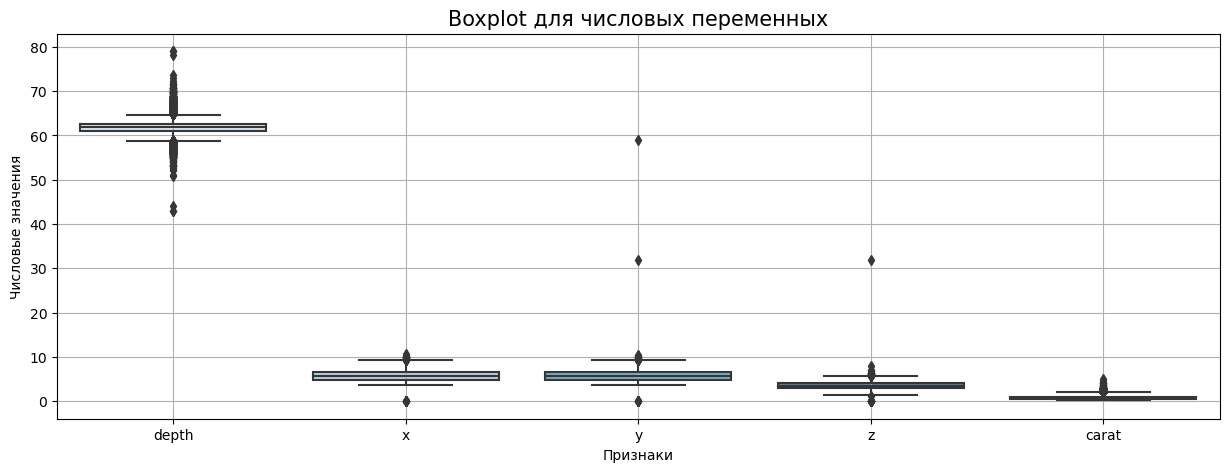

In [5]:
plt.figure(figsize = [15, 5])
sns.boxplot(data = df[['depth', 'x', 'y', 'z', 'carat']], palette="Blues")
plt.title('Boxplot для числовых переменных', fontsize = 15)
plt.grid()
plt.xlabel('Признаки')
plt.ylabel('Числовые значения')
plt.show()

In [6]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

Пустых значений не найдено

In [7]:
# группируем данные по категориям и выводим общую табличку с описательными статистиками
df_stat = df.drop(columns = ['price', 'table']).describe().transpose()

df_stat['iqr'] = df_stat['75%'] - df_stat['25%']

df_stat['lower_bound'] = df_stat['25%'] - 1.5 * df_stat['iqr']
df_stat['upper_bound'] = df_stat['75%'] + 1.5 * df_stat['iqr']

# скорректируем нижнюю границу из отрицательных значений до нуля
df_stat['lower_bound'] = np.where(df_stat['lower_bound'] < 0, 0, df_stat['lower_bound'])

# проверим есть ли вхоть один выброс по верхней границе
df_stat['any_outlier'] = np.where(df_stat['max'] - df_stat['upper_bound'] > 0, 'yes', 'no')

# наличие выбросов по максимальному значению
df_stat

,count,mean,std,min,25%,50%,75%,max,iqr,lower_bound,upper_bound,any_outlier
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01,0.64,0.000,2.000,yes
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00,1.50,58.750,64.750,yes
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74,1.83,1.965,9.285,yes
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90,1.82,1.990,9.270,yes
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80,1.13,1.215,5.735,yes


In [8]:
df_stat = df_stat[['lower_bound','upper_bound']]
df_stat = df_stat.transpose()

In [9]:
df_stat

,carat,depth,x,y,z
lower_bound,0.0,58.75,1.965,1.99,1.215
upper_bound,2.0,64.75,9.285,9.27,5.735


In [10]:
df.drop(df[df['carat'] > df_stat.iloc[1]['carat']].index, inplace = True)

In [11]:
df.drop(df[(df['depth'] < df_stat.iloc[0]['depth']) | (df['depth'] > df_stat.iloc[1]['depth'])].index, inplace = True)
df.drop(df[(df['x'] < df_stat.iloc[0]['x']) | (df['x'] > df_stat.iloc[1]['x'])].index, inplace = True)
df.drop(df[(df['y'] < df_stat.iloc[0]['y']) | (df['y'] > df_stat.iloc[1]['y'])].index, inplace = True)
df.drop(df[(df['z'] < df_stat.iloc[0]['z']) | (df['z'] > df_stat.iloc[1]['z'])].index, inplace = True)

Если вы всё сделали верно, в вашем датафрейме должно было остаться около 49666 объектов. Удостоверьтесь в этом, используя атрибут `.shape`

In [12]:
df.shape

(49666, 10)

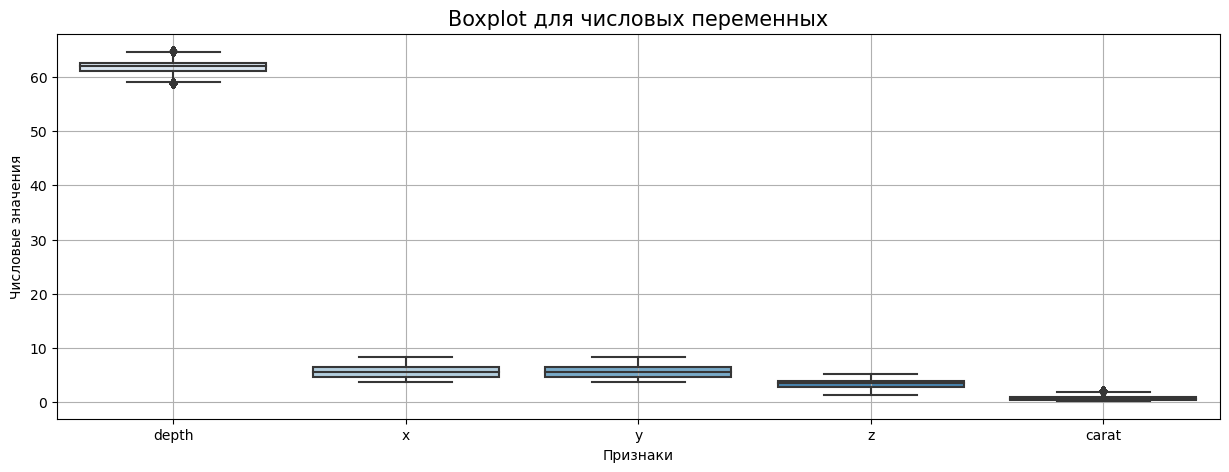

In [13]:
plt.figure(figsize = [15, 5])
sns.boxplot(data = df[['depth', 'x', 'y', 'z', 'carat']], palette="Blues")
plt.title('Boxplot для числовых переменных', fontsize = 15)
plt.grid()
plt.xlabel('Признаки')
plt.ylabel('Числовые значения')
plt.show()

## Задание 2 (1 балл): исследуем предпосылки к применению линейной модели

Как известно, перед построением линейной модели мы хотим знать, есть ли к этому предпосылки в наших данных. Более конкретно, мы хотим проверить два свойства: 
- отсутствие мультиколлинеарности (зависимые переменные коррелируют с прогнозируемой, но не между собой)
- линейная зависимость прогнозируемой переменной от регрессоров (в нашем случае — переменной price от depth, x, y, z)

Постройте тепловую карту и парные графики рассеяния для переменных price, depth, x, y, z (подсказка: используйте `sns.heatmap` и `sns.pairplot`). Проанализируйте полученные графики:
- есть ли линейная связь между ценой и какими-либо регрессорами? 
- есть ли мультиколлинеарность между регрессорами?

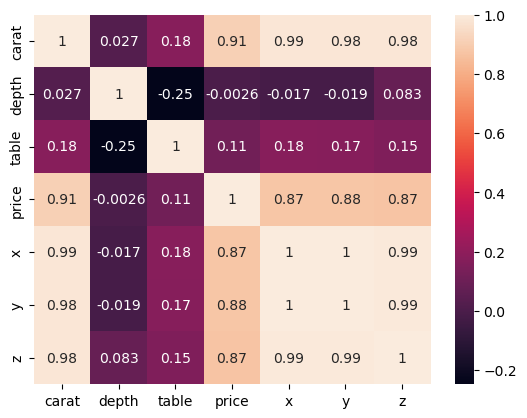

In [14]:
sns.heatmap(data = df.corr(), annot=True)
plt.show()

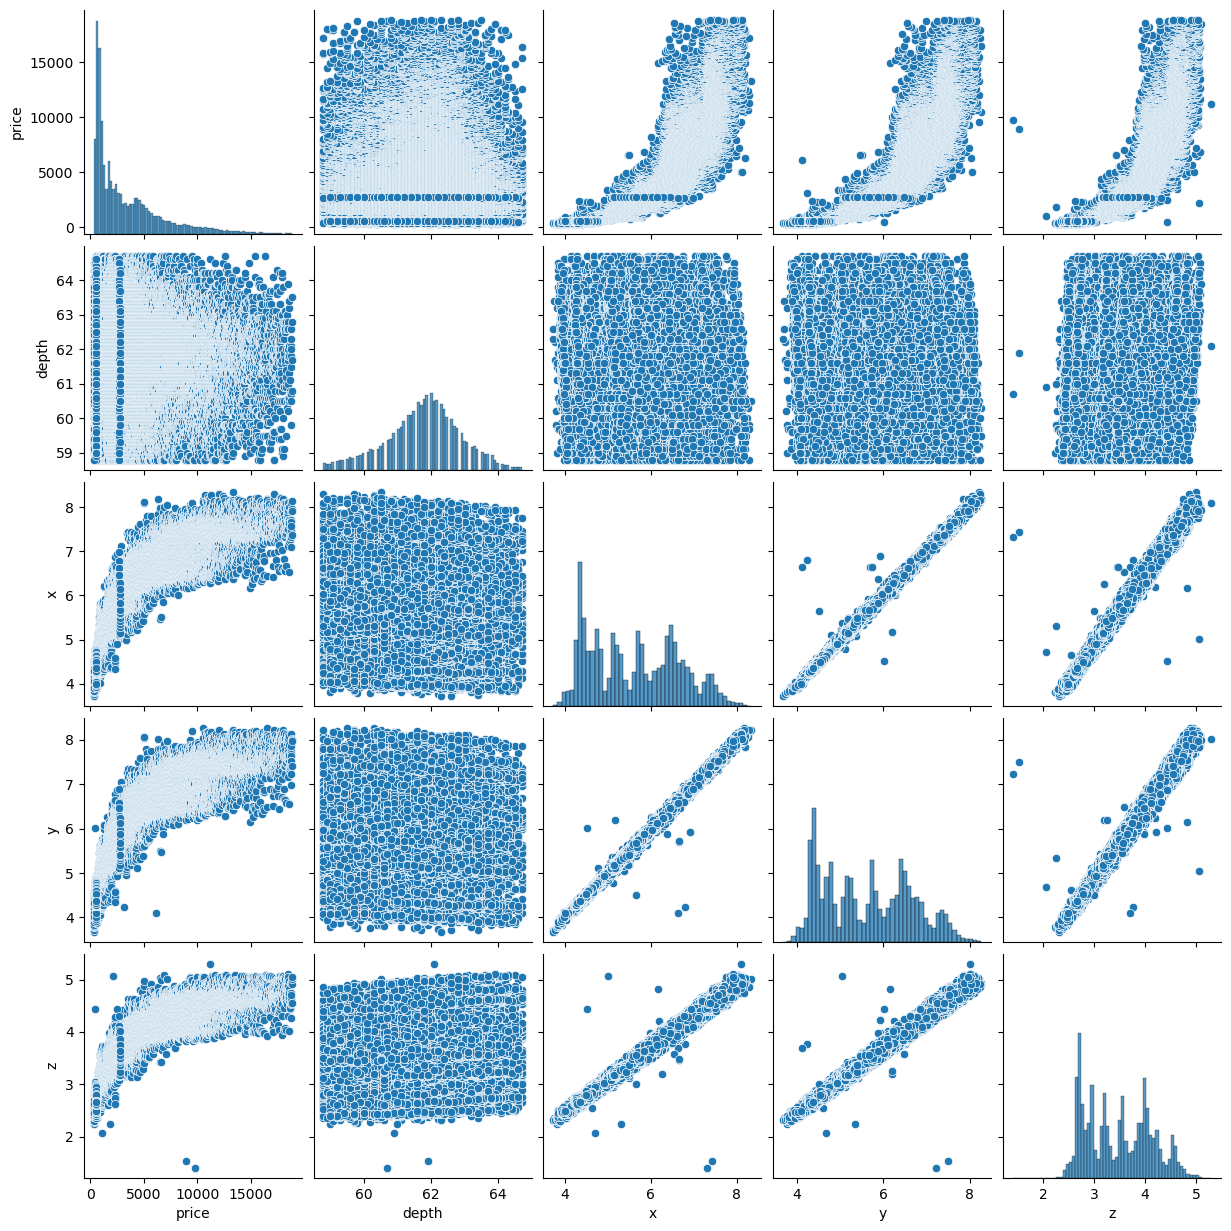

In [15]:
sns.pairplot(data = df[['price', 'depth', 'x', 'y', 'z']])

Между признаками x, y, z у нас прослеживается явная мультиколлинеарность(на это указдывают как графики в виде линии, так и корреляционная матрица). Получается, что в последующих моделях нам будет достаточно использование одной из этих переменных, причем любой. С признаком price не коррелирует только признак depth.

## Задание 3 (1 балл): одномерная линейная регрессия 

Используя графики выше, выберите один регрессор, который, как вам кажется, наиболее хорошо кореллирует с целевой переменной, и постройте (обучите) модель линейной регрессии для прогнозирования цены бриллианта по этому регрессору. 

Вы можете использовать любую угодную Вам библиотеку

выберем в качестве регрессора параметр 'y'

In [16]:
X = df['y']
Y = df['price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train = X_train.to_numpy().reshape(-1,1)
X_test = X_test.to_numpy().reshape(-1,1)
Y_train = Y_train.to_numpy().reshape(-1,1)
Y_test = Y_test.to_numpy().reshape(-1,1)
model = LinearRegression().fit(X_train, Y_train)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: [-13054.30267957]
slope: [[2947.79832587]]


Проинтерпретируйте полученный коэффициент. Например: при изменении данного регрессора на Х целевая переменная изменится на Y

Получается так, что при изменении регрессора y на 1, то цена изменится на 2947

Предположим, у нас есть некоторый бриллиант со следующими характеристиками: 

- carat = 0.90
- depth = 62.7
- table = 60
- x = 6.12
- y = 6.07
- z = 3.82

Какую цену на данный бриллиант можно спрогнозировать, используя полученную модель? 

In [17]:
y_pred = model.predict(np.array(6.12).reshape((-1, 1)))
print(*y_pred)

[4986.22307473]


Можно спрогнозировать цену в 4986.

## Задание 4 (1 балл): оценка качества модели

Теперь оценим качество получившейся модели на нашем датасете.

- посчитайте коэффициент $R^2$. Каким образом его можно проинтерпретировать? Что можно сказать о качестве получившегося прогноза?
- Выберите еще одну метрику для оценки качества модели регрессии и посчитайте её (например, MSE, MAE, RMSE, MAPE)

In [18]:
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)
r2_train = r2_score(Y_train, y_train_predict)
r2_test = r2_score(Y_test, y_test_predict)

print('R2 на обучающей выборке = {}'.format(r2_train))
print('R2 на тестовой выборке = {}'.format(r2_test))
print(mean_squared_error(Y_test, y_test_predict, squared = False))

R2 на обучающей выборке = 0.7666199871839594
R2 на тестовой выборке = 0.7678124909035845
1626.2109244083485


Одним из способом оценки качества линейной модели является значение R-квадрат. R-квадрат-это это доля объяснённой суммы квадратов в общей
Чем выше R-квадрат, тем лучше, потому что это означает, что большая дисперсия объясняется моделью.
rmse = 1626

## Задание 5 (1 балл): визуализация прогнозов модели

Поскольку модель у нас линейная и пока что зависит всего от одного регрессора, мы можем построить график с фактической и прогнозируемой ценой бриллианта! Давайте сделаем это. 

По оси X отложите выбранный Вами регрессоор, по оси Y — цену бриллианта. Каждый объект выборки отметьте на этом графике точкой (=постройте диаграмму рассеяния), а также на тот же график нанесите линию с прогнозом модели. 

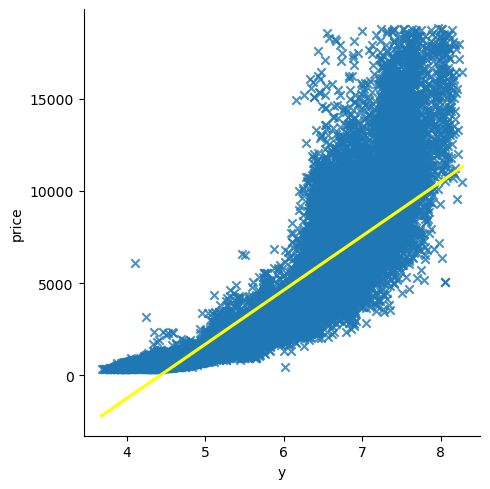

In [19]:
sns.lmplot(x='y',y='price',data=df, markers = 'x', line_kws={'color': 'yellow'})

## Задание 6 (2 балла): множественная линейная регрессия 

- Постройте новую модель, на этот раз в качестве регрессоров используйте все переменные из задания №2. 
- Посчитайте качество нашей модели (коэффициент детерминации $R^2$). Как изменилось качество? Стала ли новая модель лучше или хуже? 
- Взгляните на получившиеся коэффициенты. Как поменялся коэффициент при регрессоре из задания №3? 
- Сделайте новой моделью прогноз стоимости для бриллианта из задания №3. Как поменялся прогноз? 

In [20]:
x = df[['depth', 'x', 'y', 'z']]
y = df['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression().fit(x_train, y_train)
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: -15147.615723494348
Coefficients: [  33.63790882 -401.50634178 3282.49812448  112.0597633 ]


In [21]:
y_train_predict = model.predict(x_train)
y_test_predict = model.predict(x_test)
r2_train = r2_score(y_train, y_train_predict)
r2_test = r2_score(y_test, y_test_predict)

print('R2 на обучающей выборке = {}'.format(r2_train))
print('R2 на тестовой выборке = {}'.format(r2_test))

R2 на обучающей выборке = 0.7668180845983672
R2 на тестовой выборке = 0.7680783012244576


In [22]:
w = {'depth': [62.7],'x': [6.12],'y': [6.07],'z': [3.82]}
y_pred = model.predict(pd.DataFrame(w))
print(*y_pred)

4857.0942589604


прогноз новой модели почти не изменился, как и почти не изменилось ее качество, потому что мы взяли и запихнули в модель во первых не коррелирующий с целевым признаком признак, а также запихнули туда три мультиколлинеарных признака. В следующем задании я покажу как надо.

## БОНУС! (1 балл): категориальные переменные

До этого мы намеренно выбрали из нашего датафрейма только числовые переменные. На практике часто какая-либо информация содержится в категориальных переменных, и их, разумеется, тоже хочется учитывать, когда мы делаем прогноз. 

Самостоятельно изучите один из способов кодирования категориальных переменных. Например, One-Hot Encoding, Mean Target Encoding, Ordinal Encoding (применим ли этот способ в данном случае? Взгляните на описание категориальных переменных). 

Реализуйте этот способ и обучите новую модель, на этот раз добавив туда ещё и закодированные категориальные переменные. 

- как изменилось качество модели? 
- какой вклад вносят категориальные переменные? Проинтерпретируйте коэффициенты при них

In [23]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder(categories=[['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']])
df['cut1'] = enc.fit_transform(df.loc[:,['cut']])

In [24]:
enc1 = OrdinalEncoder(categories=[['J', 'I', 'H', 'G', 'F', 'E', 'D']])
df['color1'] = enc1.fit_transform(df.loc[:,['color']])

In [25]:
enc2 = OrdinalEncoder(categories=[['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']])
df['clarity1'] = enc2.fit_transform(df.loc[:,['clarity']])

In [26]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z,cut1,color1,clarity1
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,4.0,5.0,1.0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3.0,5.0,2.0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3.0,1.0,3.0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1.0,0.0,1.0
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,2.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,4.0,6.0,2.0
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,1.0,6.0,2.0
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,2.0,6.0,2.0
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,3.0,2.0,1.0


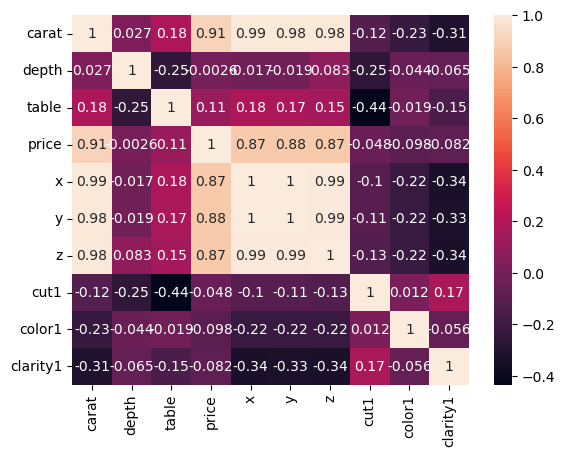

In [27]:
sns.heatmap(data = df.corr(), annot=True)
plt.show()

In [28]:
x = df[['carat','table', 'y', 'cut1', 'color1', 'clarity1']]
y = df['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression().fit(x_train, y_train)
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: 2291.404759933921
Coefficients: [13232.67179676   -27.3878775  -1774.04595528   102.12099357
   328.04505678   484.29890157]


In [29]:
y_train_predict = model.predict(x_train)
y_test_predict = model.predict(x_test)
r2_train = r2_score(y_train, y_train_predict)
r2_test = r2_score(y_test, y_test_predict)

print('R2 на обучающей выборке = {}'.format(r2_train))
print('R2 на тестовой выборке = {}'.format(r2_test))

R2 на обучающей выборке = 0.9035322439200705
R2 на тестовой выборке = 0.901812890837749


In [30]:
print(mean_squared_error(y_test, y_test_predict, squared = False))

1057.5104918055697


Таким образом, добавив категориальные энкодированные признаки и взяв подходящие нам признаки мы улучшили качество до 0,901, а также снизили rmse до 1057. Интерпретитровать категориальные признаки можно так: что с поднятием на следующий уровень 'крутизны' допустим огранки, цена повысится на 102.12, и так далее.

# Логистическая регрессия

Часто мы хотим строить модели не только для непрерывных переменных, но и номинальных. Для этого используется логистическая регрессия. 

Давайте немного поменяем постановку нашей задачи: предположим, мы знаем все характеристики бриллианта, кроме его огранки. И по этим характеристикам мы хотим ответить на вопрос: является ли огранка (колонка cut) идеальной или нет (идеальная огранка — это значение "Ideal" в колонке "cut")

## Задание 7 (0.5 балла): подготовка данных для логрегрессии

В данном случае мы будем решать задачу бинарной классификации: является ли огранка "идеальной"?

Для этого нам прежде всего нужно создать новую объясняемую переменную. Добавьте в датафрейм новую колонку target, получив её из колонки cut:
- если cut = "Ideal", то target = 1
- иначе, target = -1

После этого оставьте в датафрейме только следующие колонки: 
- target 
- price
- carat
- depth
- table

In [31]:
df['target'] = df['cut'].replace({'Ideal': 1, 'Very Good': -1, 'Good': -1, 'Premium': -1, 'Fair': -1})
df = df[['target', 'price', 'carat', 'depth', 'table']]
df

,target,price,carat,depth,table
0,1,326,0.23,61.5,55.0
1,-1,326,0.21,59.8,61.0
3,-1,334,0.29,62.4,58.0
4,-1,335,0.31,63.3,58.0
5,-1,336,0.24,62.8,57.0
...,...,...,...,...,...
53935,1,2757,0.72,60.8,57.0
53936,-1,2757,0.72,63.1,55.0
53937,-1,2757,0.70,62.8,60.0
53938,-1,2757,0.86,61.0,58.0


Также в задачах машинного обучения часто обучение (подборка коэффициентов модели) и оценка качества делаются на разных датасетах, называемых, соответственно, тренировочной и тестовой выборками. 

Связано это с тем, что обычно качество хочется проверить на "новых" объектах, не участвовавших в подборке коэффициентов. 

Изучите функцию train_test_split из библиотеки sklearn и поделите датасет на тренировочную и тестовую выборку так, чтобы train:test=3:1

In [32]:
X = df[['price','carat', 'depth', 'table']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Задание 8 (1 балл): построение логистической регрессии

Обучите на вашей тренировочной выборке логистическую регрессию. Выведите на экран коэффициенты и проинтерпретируйте их: каким образом каждая из переменных влияет на вероятность того, что у бриллианта идеальная огранка? 

In [33]:
logreg = LogisticRegression().fit(X_train, y_train)
print(logreg.coef_)

[[-2.08326023e-05 -2.13825887e-02  4.29636092e-01 -4.69487081e-01]]


Сложно, очень сложно, там надо в формулу подставлять и что то делать..., но коэффиценты есть.

## Задание 9 (1.5 балла): метрики логистической регрессии

На **тестовой** выборке:

- посчитайте accuracy (долю верных ответов) вашей модели. Правда ли, что ваша модель лучше, чем констнатный классификатор (отвечающий всегда "да" или всегда "нет")?

- Постройте ROC-кривую для вашей модели, а также посчитайте ROC-AUC. Правда ли, что ваша модель лучше, чем модель, выдающая случайный ответ (имеющая ROC-AUC=0.5). Не забудьте, что для расчета ROC AUC вам нужны прогнозы вероятностей, а не классов!

In [34]:
print('Accuracy на тесте:', accuracy_score(y_test, logreg.predict(X_test)))
print('Precision на тесте:', precision_score(y_test, logreg.predict(X_test)))
print('Recall на тесте:', recall_score(y_test, logreg.predict(X_test)))
print('F1 на тесте:', f1_score(y_test, logreg.predict(X_test)))
print('ROC-AUC на тесте:', roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1]))

Accuracy на тесте: 0.6945316904244181
Precision на тесте: 0.6468926553672316
Recall на тесте: 0.6107830062869118
F1 на тесте: 0.6283194512493876
ROC-AUC на тесте: 0.7682233106050812


Accuracy(0.69)>0.5 следовательно наша модель лучше константного классификатора.
ROC-AUC(0.76)>0.5 следовательно наша модель лучше рандомно выдающей ответы

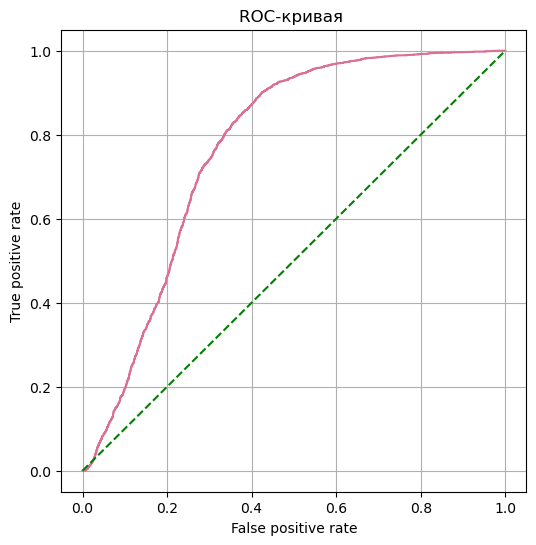

In [35]:
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])
plt.figure(figsize=(6, 6))

plt.title('ROC-кривая ')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

plt.plot(fpr, tpr, color='palevioletred')
plt.plot([0, 1], [0, 1], linestyle='--', color='green')

plt.grid()
plt.show()